# Assignment 7

In [2]:
# george trammell
import pandas as pd
import seaborn as sns
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Setup

In [3]:
# data from https://archive.ics.uci.edu/dataset/186/wine+quality
# running in colab, upload dataset file to instance
df = pd.read_csv("/content/winequality-red.csv", delimiter = ";") # file is semicolon delimited
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df.info()
# explore column types and non-null counts, looks good
# quality is rated 1-10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape
# relatively small dataset

(1599, 12)

## Plotting

<Axes: title={'center': 'Citric Acid Content'}, ylabel='Frequency'>

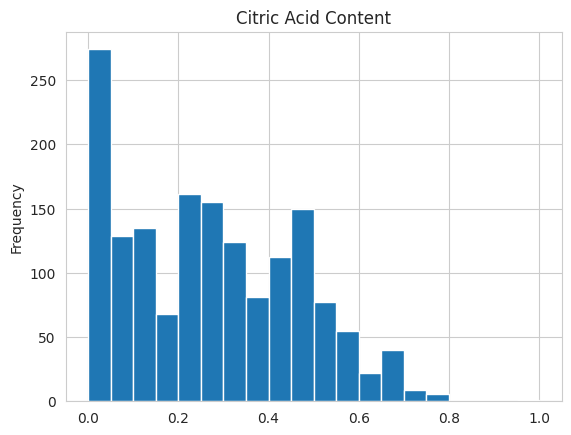

In [6]:
df['citric acid'].plot(kind='hist', bins=20, title='Citric Acid Content')
# exploring things like citric acid content and fixed acidity
# lots with very low citric acid content

<Axes: title={'center': 'Fixed Acidity Distribution'}, ylabel='Frequency'>

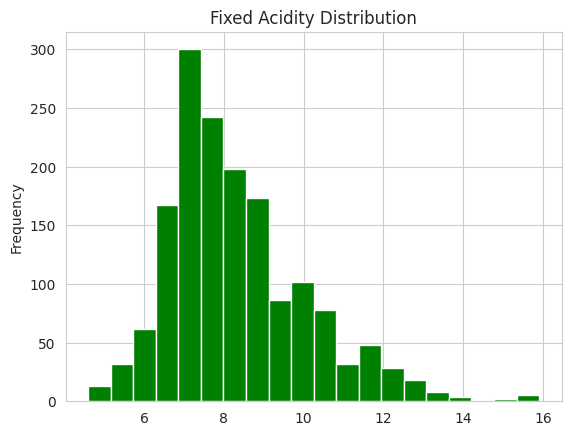

In [7]:
df['fixed acidity'].plot(kind='hist', bins=20, title='Fixed Acidity Distribution', color="green")
# semi-normal curve for fixed (non-volatile) acidity

<Axes: xlabel='quality', ylabel='alcohol'>

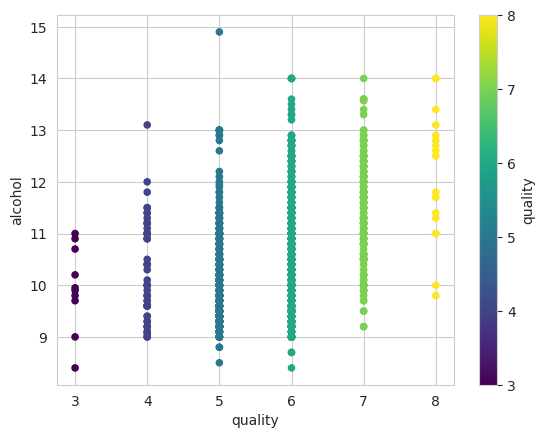

In [9]:
df.plot(kind='scatter',
        x='quality',
        y='alcohol',
        c='quality',
        cmap='viridis',
        colorbar=True)
# seems that alcohol content and wine quality have a somewhat positive correlation

<Axes: xlabel='quality', ylabel='residual sugar'>

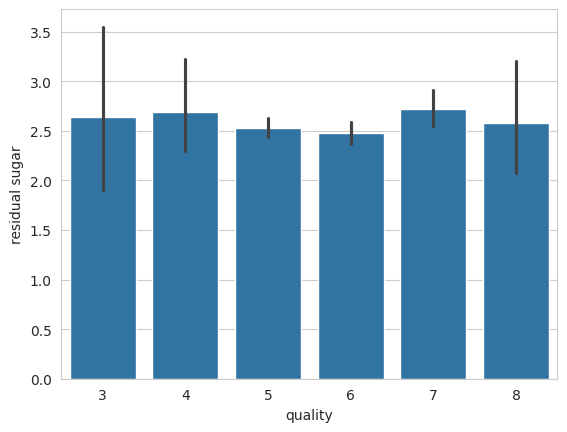

In [10]:
sns.barplot(x='quality', y='residual sugar', data=df)
# not much correlation between sugar content and quality though

## Hypothoses:

1. I'm expecting to see a negative correlation between volatile acidity and wine quality. Volatile acidity can ruin the aroma of a fine wine and can even lead to an unpleasant vinegar taste at higher levels.

2. I'd also expect to find a significant relationship between residual sugar content and the density of a wine, because that just seems like it makes sense.

## Testing

Text(0, 0.5, 'Volatile Acidity')

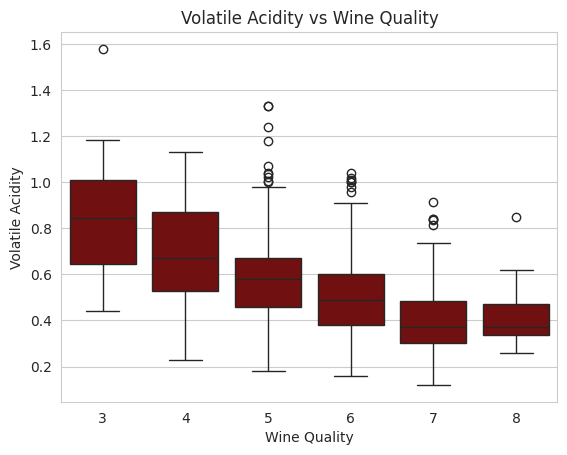

In [8]:
# 1. volatile acidity vs quality
plt = sns.boxplot(x='quality', y='volatile acidity', data=df, color="maroon")
plt.set_title('Volatile Acidity vs Wine Quality')
plt.set_xlabel('Wine Quality')
plt.set_ylabel('Volatile Acidity')

# the boxes look like little red wine glasses so i thought this was a fun visualization
# seems like there is indeed a negative correlation! just based on the visiaul

Text(0.5, 1.0, 'Residual Sugar Content vs. Density')

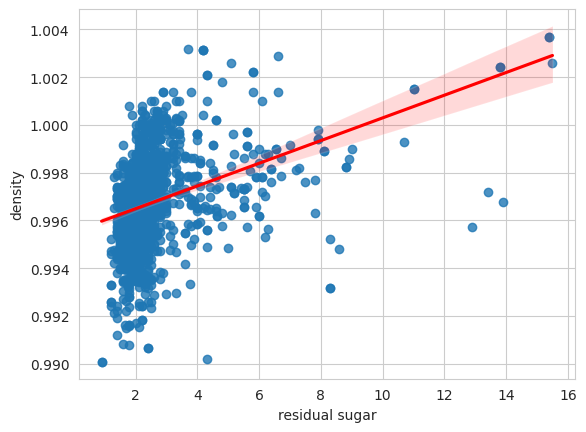

In [16]:
# 2. residual sugar vs density
sns.regplot(
    x='residual sugar',
    y='density',
    data=df,
    line_kws={'color': 'red'}
)

# constraints and title
plt.set_xlim(left=0)
plt.set_ylim(bottom=0)
plt.set_title("Residual Sugar Content vs. Density")

# seems like there is a positive correlation, neat!

In [ ]:
"""
This was a brief analysis of the wine quality dataset comparing
volatile acidity with wine quality and sugar content with density.
The visuals generated appear to support the hypothoses that volatile
acidity has a negative impact on wine quality and that sugar content has
a postive impact on density, but as these are just visualizations, more
work would have to be done to confirm the significance and validity of
these preliminary findings.

"""